In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [25]:
df = pd.read_csv("RawData.csv",index_col= "ID")

In [26]:
df.head()

,GrossMonthlyIncome,CreditCardPayment,CarPayment,StudentLoanPayments,AppraisedValue,DownPayment,LoanAmount,MonthlyMortgagePayment,CreditScore,LTV,DTI,FEDTI
ID,,,,,,,,,,,,
1,3103,317,374,250,268468,32216.16,236251.84,1127.90,778,0.88,0.666742,0.363487
2,2939,368,395,228,335467,30192.03,305274.97,2240.00,546,0.91,1.099354,0.762164
3,4676,222,352,368,461177,36894.16,424282.84,2277.64,736,0.92,0.688546,0.487092
4,8469,224,416,400,326904,22883.28,304020.72,1451.44,761,0.93,0.294183,0.171383
5,2406,497,385,444,472661,23633.05,449027.95,2987.39,615,0.95,1.792764,1.241642


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   GrossMonthlyIncome      10000 non-null  int64  
 1   CreditCardPayment       10000 non-null  int64  
 2   CarPayment              10000 non-null  int64  
 3   StudentLoanPayments     10000 non-null  int64  
 4   AppraisedValue          10000 non-null  int64  
 5   DownPayment             10000 non-null  float64
 6   LoanAmount              10000 non-null  float64
 7   MonthlyMortgagePayment  10000 non-null  float64
 8   CreditScore             10000 non-null  int64  
 9   LTV                     10000 non-null  float64
 10  DTI                     10000 non-null  float64
 11  FEDTI                   10000 non-null  float64
dtypes: float64(6), int64(6)
memory usage: 1015.6 KB


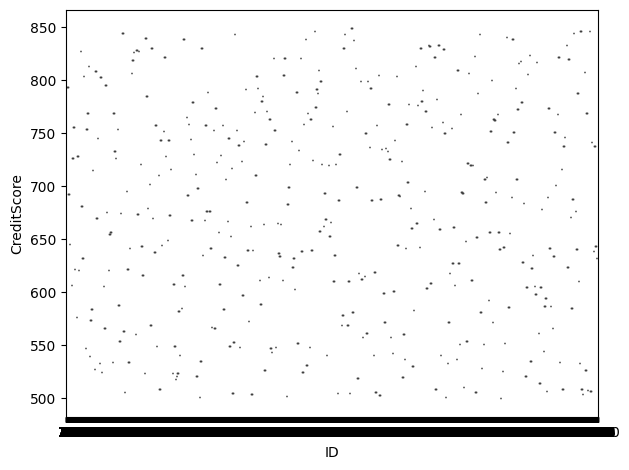

In [14]:
# Checking for outliers in Credit Score
sns.boxplot(df,x="ID",y="CreditScore")

# Show the heatmap
plt.tight_layout()
plt.show()

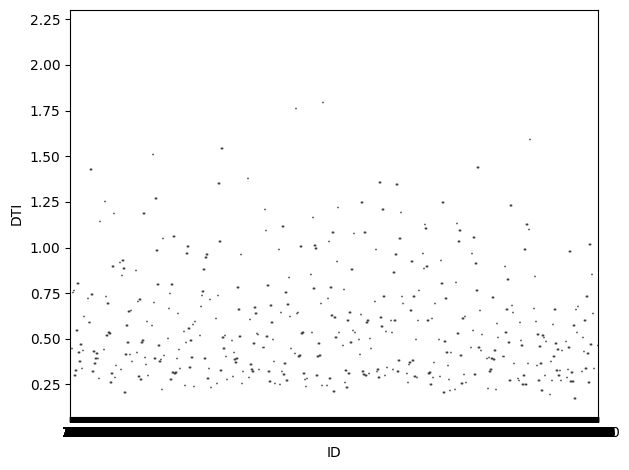

In [6]:
# Checking for outliers in DTI
sns.boxplot(df,x="ID",y="DTI")

# Show the heatmap
plt.tight_layout()
plt.show()

In [28]:
processed_data = df.iloc[:,[8,9,10,11]]
processed_data.head()

,CreditScore,LTV,DTI,FEDTI
ID,,,,
1,778,0.88,0.666742,0.363487
2,546,0.91,1.099354,0.762164
3,736,0.92,0.688546,0.487092
4,761,0.93,0.294183,0.171383
5,615,0.95,1.792764,1.241642


In [50]:
points = [] # 0 - 1
for i in range(len(processed_data)):
    CREDIT = processed_data.iloc[i,:]["CreditScore"]
    LTV = processed_data.iloc[i,:]["LTV"]
    DTI = processed_data.iloc[i,:]["DTI"]
    FEDTI = processed_data.iloc[i,:]["FEDTI"]

    point = 0
    if(CREDIT>=640):
        credit_point = (CREDIT*0.25)/850 #850 is the max credit score
        point+=credit_point

    if(0.80<LTV):
        ltv_point = 0.25
        point+=ltv_point

    if(0.80<=LTV<0.85):
        ltv_point = 0.2
        point+=ltv_point
    
    if(0.85<=LTV<0.90):
        ltv_point = 0.15
        point+=ltv_point
    
    if(0.90<=LTV<0.95):
        ltv_point = 0.1
        point+=ltv_point
    
    if(LTV>=0.95):

        ltv_point = (1.0-LTV)*0.1
        point+=ltv_point

    if(0 <=DTI <= 0.43):
        dti_point = (0.43-DTI/0.43)*0.125+ 0.125
        point += dti_point
    
    if(DTI>0.43):
        point += 0
    
    if(0<=FEDTI<=0.28):
        fedti_points = (0.1+ ((0.28-FEDTI)/0.28)*0.15)
        point +=fedti_points
    else:
        point += 0.1 * ((1-FEDTI)/0.28)
    
    if(FEDTI>0.28):
        point+=0
    points.append(point) 
    print(point)

    

0.8561496194117646
0.43494142821428566
0.7496521843067226
0.8252429167871801
0.16869938250000005
0.4400086813587063
0.7168309957638753
0.45268241092949973
0.7496496135611688
0.4970301985714286
0.8001560964915967
0.4497942610504202
0.814420947715214
0.6114092089285714
0.1769481619601329
0.8856363424821674
0.49091191071428575
0.6788882325000001
0.22762858749999998
0.8835552355252101
0.6977468450630252
0.1568189607142857
0.7630664820168067
0.695471145
0.5970004669327731
0.5836065014285714
0.5407287014285714
0.1053704435714286
0.6396029986427595
0.4370961016911765
0.4736537821526285
0.5072313203571428
0.42471687118599766
0.14137416928571428
0.892395190207397
0.6892753021008403
0.6532120909663865
0.9433832652911862
0.8863816197899159
0.20724201933139536
0.10530463696428571
0.07641324499999998
0.7121955303544558
0.306889573697479
0.850341242097909
0.6894968653571428
0.8066489401470589
0.8197527433613445
0.5263341010340532
0.46357677170168066
0.36014020535714286
0.48221313512605035
0.83910606

In [52]:
processed_data["POINTS"] = points
processed_data.head()

C:\Users\saikr\AppData\Local\Temp\ipykernel_8020\3022206582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processed_data["POINTS"] = points


,CreditScore,LTV,DTI,FEDTI,POINTS
ID,,,,,
1,778,0.88,0.666742,0.363487,0.856150
2,546,0.91,1.099354,0.762164,0.434941
3,736,0.92,0.688546,0.487092,0.749652
4,761,0.93,0.294183,0.171383,0.825243
5,615,0.95,1.792764,1.241642,0.168699
